In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



\begin{align*}
&\text{Initialization:} \\
&\qquad \text{For each layer } l \in \{1, 2, \ldots, L\}: \\
&\qquad \qquad W^{[l]} \sim \mathcal{N}(0, \sigma^2 I_{n^{[l]}, n^{[l-1]}}) \\
&\qquad \qquad b^{[l]} \sim \mathcal{N}(0, \sigma^2 I_{n^{[l]}}) \\
&\text{Forward Propagation:} \\
&\qquad \text{For each layer } l \in \{1, 2, \ldots, L\}: \\
&\qquad \qquad Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]} \\
&\qquad \qquad A^{[l]} = g^{[l]}(Z^{[l]}) \\
&\text{Cost Calculation:} \\
&\qquad J = -\frac{1}{m} \sum_{i=1}^m \left( y^{(i)} \log(A^{[L] (i)}) + (1 - y^{(i)}) \log(1 - A^{[L] (i)}) \right) \\
&\text{Backpropagation:} \\
&\qquad \text{For each training example } i \in \{1, 2, \ldots, m\}: \\
&\qquad \qquad \text{Output layer:} \\
&\qquad \qquad \qquad dZ^{[L] (i)} = A^{[L] (i)} - y^{(i)} \\
&\qquad \qquad \qquad dW^{[L]} = \frac{1}{m} dZ^{[L] (i)} A^{[L-1] (i) T} \\
&\qquad \qquad \qquad db^{[L]} = \frac{1}{m} \sum_{i=1}^m dZ^{[L] (i)} \\
&\qquad \qquad \qquad dA^{[L-1]} = W^{[L] T} dZ^{[L]} \\
&\qquad \qquad \text{Hidden layers:} \\
&\qquad \qquad \qquad dZ^{[l] (i)} = dA^{[l] (i)} \cdot g^{[l]'}(Z^{[l] (i)}) \\
&\qquad \qquad \qquad dW^{[l]} = \frac{1}{m} dZ^{[l] (i)} A^{[l-1] (i) T} \\
&\qquad \qquad \qquad db^{[l]} = \frac{1}{m} \sum_{i=1}^m dZ^{[l] (i)} \\
&\qquad \qquad \qquad dA^{[l-1]} = W^{[l] T} dZ^{[l]} \\
&\text{Parameter Update:} \\
&\qquad \text{For each layer } l \in \{1, 2, \ldots, L\}: \\
&\qquad \qquad W^{[l]} = W^{[l]} - \alpha dW^{[l]} \\
&\qquad \qquad b^{[l]} = b^{[l]} - \alpha db^{[l]}
\end{align*}




In [3]:
X_train_org, y_train, X_test_org, y_test = np.load('datas/Files/cat_train_x.npy'),np.load('datas/Files/cat_train_y.npy'),np.load('datas/Files/cat_test_x.npy'),np.load('datas/Files/cat_test_y.npy')
train_x_flatten = X_train_org.reshape(X_train_org.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_test_org.reshape(X_test_org.shape[0], -1).T

X_train = train_x_flatten/255.
X_test = test_x_flatten/255.

In [4]:
X_train.shape

(12288, 209)

In [5]:
X_test_org

array([[[[158, 104,  83],
         [161, 106,  85],
         [162, 107,  84],
         ...,
         [170, 120, 100],
         [167, 121, 103],
         [172, 127, 109]],

        [[158, 103,  82],
         [160, 104,  82],
         [162, 105,  83],
         ...,
         [169, 118,  99],
         [164, 117,  98],
         [168, 121, 104]],

        [[158, 104,  82],
         [161, 105,  82],
         [162, 105,  83],
         ...,
         [173, 123, 102],
         [169, 122, 104],
         [168, 122, 104]],

        ...,

        [[102,  68,  52],
         [ 44,  31,  23],
         [ 28,  23,  20],
         ...,
         [163, 118, 102],
         [163, 120, 103],
         [166, 121, 105]],

        [[ 99,  67,  51],
         [ 38,  28,  22],
         [ 30,  26,  23],
         ...,
         [161, 117, 100],
         [164, 121, 104],
         [168, 123, 106]],

        [[127,  95,  72],
         [ 39,  29,  22],
         [ 30,  25,  22],
         ...,
         [165, 122, 105],
        

0


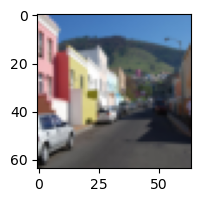

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(X_train_org[1])
print(y_train[0][1])
plt.show()

In [7]:
y_train.shape

(1, 209)

# Partial changes needed to be made

In [ ]:
def __init__(self, layer_dims, beta=0.9):
        self.layer_dims = layer_dims
        self.parameters = {}
        self.cost = 0
        self.number_of_layers = len(self.layer_dims) - 1
        self.beta = beta
        self.v = {} 

def __update_parameters(self, learning_rate, grads):
        for l in range(1, self.number_of_layers):
            # Update the velocity using momentum
            self.v["dW" + str(l + 1)] = self.beta * self.v.get("dW" + str(l + 1), 0) + (1 - self.beta) * grads["dW" + str(l + 1)]
            self.v["db" + str(l + 1)] = self.beta * self.v.get("db" + str(l + 1), 0) + (1 - self.beta) * grads["db" + str(l + 1)]

            # Update parameters using momentum
            self.parameters["W" + str(l + 1)] = self.parameters["W" + str(l + 1)] - learning_rate * self.v["dW" + str(l + 1)]
            self.parameters["b" + str(l + 1)] = self.parameters["b" + str(l + 1)] - learning_rate * self.v["db" + str(l + 1)]

In [ ]:
# ... (other parts of the code)

class BPNN:
    # ... (previous methods and initialization)

    def __cost(self, A_last_layer, y, lambd):
        m = y.shape[1]
        cross_entropy_cost = (-1 / m) * np.sum(np.multiply(y, np.log(A_last_layer)) + np.multiply(1 - y, np.log(1 - A_last_layer)))
        
        # Regularization term
        L2_regularization_cost = 0
        for l in range(1, self.number_of_layers + 1):
            L2_regularization_cost += np.sum(np.square(self.parameters["W" + str(l)]))
        
        cost = cross_entropy_cost + (lambd / (2 * m)) * L2_regularization_cost
        self.cost = np.squeeze(cost)

    def __backward_propagation(self, A_last_layer, y, caches, lambd):
        grads = {}
        L = self.number_of_layers
        y = y.reshape(A_last_layer.shape)

        dA_last_layer = - (np.divide(y, A_last_layer) - np.divide(1 - y, 1 - A_last_layer))
        dA_prev, dW, db = self.linear_activation_backward(dA_last_layer, caches[L - 1], "sigmoid")
        
        # Add L2 regularization term to gradient
        dW += (lambd / A_last_layer.shape[1]) * self.parameters["W" + str(L)]

        grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db

        for l in reversed(range(L - 1)):
            dA = dA_prev
            dA_prev, dW, db = self.linear_activation_backward(dA, caches[l], "relu")
            
            # Add L2 regularization term to gradient
            dW += (lambd / A_last_layer.shape[1]) * self.parameters["W" + str(l + 1)]

            grads["dA" + str(l)] = dA_prev
            grads["dW" + str(l + 1)] = dW
            grads["db" + str(l + 1)] = db

        grads["dA1"] = grads['dA2']
        del grads['dA2']

        return grads

    def fit(self, X, y, learning_rate=0.001, num_iter=1000, print_cost=False, lambd=0.0):
        # ... (other parts of the code)
        
        for i in range(num_iter):
            # ... (other parts of the code)

            #backward propagation
            grads = self.__backward_propagation(A_last_layer=last_layer_output,
                                                y=y,
                                                caches=caches,
                                                lambd=lambd)

            # ... (other parts of the code)


# Plain Gradient Descent

In [14]:
class BPNN:
    def __init__(self,layer_dims):
        self.layer_dims = layer_dims
        self.parameters = {}
        self.cost = 0
        self.number_of_layers = len(self.layer_dims) - 1


    def __initialize_paramters(self):
        np.random.seed(1)
        for l in range(1,self.number_of_layers + 1):
            self.parameters["W"+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * 0.01
            self.parameters["b"+str(l)] = np.zeros(shape=(self.layer_dims[l],1))
            
    def __forward_propogation(self,X):

        def relu(x):
            return np.maximum(0,x)
        def sigmoid(x):
              return 1 / (1 + np.exp(-x))

        
        def linear_activation_forward(A_prev,W,b,activation):

            if activation == "sigmoid":
                Z = np.dot(W,A_prev) + b
                A = sigmoid(Z)
            elif activation == "relu":
                Z = np.dot(W,A_prev) + b
                A = relu(Z)
            activation_cache = Z
            return A,activation_cache
                
        
        A = X
        caches = []
        L = self.number_of_layers
        
        for l in range(1,self.number_of_layers):
            
            A_prev = A
            W,b = self.parameters["W" + str(l)],self.parameters["b"+str(l)]
            linear_cache = (A_prev,W,b)
            A,activation_cache = linear_activation_forward(A_prev=A_prev,
                                          W=W,
                                          b=b,
                                          activation="relu")
            cache = (linear_cache,activation_cache)
            caches.append(cache)
        
        W,b=self.parameters["W"+ str(L)],self.parameters["b" + str(L)]
        linear_cache = (A,W,b)
        A_last_layer,activation_cache = linear_activation_forward(A_prev=A,
                                                 W=W,
                                                 b=b,
                                                 activation="sigmoid")
        
        cache = (linear_cache,activation_cache)
        caches.append(cache)

        return A_last_layer,caches
            
   
    
    def __backward_propogation(self,A_last_layer,y,caches):

        def linear_activation_backward(dA,cache,activation):
             linear_cache,activation_cache = cache

             if activation == "sigmoid":
                 s = 1 / (1 + np.exp(-activation_cache))
                 dZ = dA * s * (1-s)
             elif activation == "relu":
                 dZ = np.multiply(dA,np.int64(activation_cache > 0))


              # """linear backward"""
             A_prev, W, b = linear_cache
             m = A_prev.shape[1]

             dW = np.dot(dZ,A_prev.T) / m 
             db = np.sum(dZ, axis=1, keepdims=True) / m
             dA_prev = np.dot(W.T, dZ)

             return dA_prev, dW, db
              
        
        grads = {}
        L = self.number_of_layers
        y = y.reshape(A_last_layer.shape)

        dA_last_layer = - (np.divide(y, A_last_layer) - np.divide(1 - y, 1 - A_last_layer));
        dA_prev, dW, db = linear_activation_backward(dA_last_layer,caches[L - 1],"sigmoid")        
        grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db;
        
        for l in reversed(range(L-1)):
            dA = dA_prev
            dA_prev, dW, db = linear_activation_backward(dA,caches[l],"relu")
            grads["dA" + str(l)] = dA_prev
            grads["dW" + str(l + 1)] = dW
            grads["db" + str(l + 1)] = db
            
        grads["dA1"]=grads['dA2']
        del(grads['dA2'])
        
        return grads
    
    def __update_parameters(self,learning_rate,grads):
       
        for l in range(1,self.number_of_layers):
            self.parameters["W" + str(l + 1)] = self.parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
            self.parameters["b" + str(l + 1)] = self.parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    
    def __cost(self,A_last_layer,y):
        m = y.shape[1]
        cost = (-1 / m) * np.sum(np.multiply(y, np.log(A_last_layer)) + np.multiply(1 - y, np.log(1 - A_last_layer)))

        self.cost = np.squeeze(cost)        

    def fit(self,X,y,learning_rate=0.001,num_iter=1000,print_cost=False):

        np.random.seed(1)
        self.__initialize_paramters()

        for i in range(0,num_iter):

            # forward propa=ogation
            last_layer_output,caches = self.__forward_propogation(X)
            
            #calculate cost value
            self.__cost(last_layer_output,y)

            #backward propagation
            grads = self.__backward_propogation(A_last_layer=last_layer_output,
                                                y=y,
                                                caches=caches) 

            #update paramters
            self.__update_parameters(learning_rate=learning_rate,
                                     grads=grads)

            if print_cost and i%100 == 0:
                print("Cost after iteration {}: {}".format(i, np.squeeze(self.cost)))

                
    def predict(self,image):
        A_last_layer, _ = self.__forward_propogation(image)
        print(A_last_layer)
        predictions = (A_last_layer > 0.5).astype(int)  # Assuming binary classification
        
        return predictions

# Regularization Term added for Gradient Descent

In [33]:
import numpy as np

class BPNN:
    def __init__(self, layer_dims):
        self.layer_dims = layer_dims
        self.parameters = {}
        self.cost = 0
        self.number_of_layers = len(self.layer_dims) - 1

    def __initialize_parameters(self):
        np.random.seed(1)
        for l in range(1, self.number_of_layers + 1):
            self.parameters["W" + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * 0.01
            self.parameters["b" + str(l)] = np.zeros(shape=(self.layer_dims[l], 1))

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def linear_activation_forward(self, A_prev, W, b, activation):
        if activation == "sigmoid":
            Z = np.dot(W, A_prev) + b
            A = self.sigmoid(Z)
        elif activation == "relu":
            Z = np.dot(W, A_prev) + b
            A = self.relu(Z)
        activation_cache = Z
        return A, activation_cache

    def __forward_propagation(self, X):
        A = X
        caches = []
        L = self.number_of_layers

        for l in range(1, L):
            A_prev = A
            W, b = self.parameters["W" + str(l)], self.parameters["b" + str(l)]
            linear_cache = (A_prev, W, b)
            A, activation_cache = self.linear_activation_forward(A_prev, W, b, activation="relu")
            cache = (linear_cache, activation_cache)
            caches.append(cache)

        W, b = self.parameters["W" + str(L)], self.parameters["b" + str(L)]
        linear_cache = (A, W, b)
        A_last_layer, activation_cache = self.linear_activation_forward(A, W, b, activation="sigmoid")

        cache = (linear_cache, activation_cache)
        caches.append(cache)

        return A_last_layer, caches

    def linear_activation_backward(self, dA, cache, activation):
        linear_cache, activation_cache = cache

        if activation == "sigmoid":
            s = self.sigmoid(activation_cache)
            dZ = dA * s * (1 - s)
        elif activation == "relu":
            dZ = np.multiply(dA, np.int64(activation_cache > 0))

        A_prev, W, b = linear_cache
        m = A_prev.shape[1]

        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)

        return dA_prev, dW, db

    def __backward_propagation(self, A_last_layer, y, caches, lambd):
        grads = {}
        L = self.number_of_layers
        y = y.reshape(A_last_layer.shape)

        dA_last_layer = - (np.divide(y, A_last_layer) - np.divide(1 - y, 1 - A_last_layer))
        dA_prev, dW, db = self.linear_activation_backward(dA_last_layer, caches[L - 1], "sigmoid")
        
        # Add L2 regularization term to gradient
        dW += (lambd / A_last_layer.shape[1]) * self.parameters["W" + str(L)]

        grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db

        for l in reversed(range(L - 1)):
            dA = dA_prev
            dA_prev, dW, db = self.linear_activation_backward(dA, caches[l], "relu")
            
            # Add L2 regularization term to gradient
            dW += (lambd / A_last_layer.shape[1]) * self.parameters["W" + str(l + 1)]

            grads["dA" + str(l)] = dA_prev
            grads["dW" + str(l + 1)] = dW
            grads["db" + str(l + 1)] = db

        grads["dA1"] = grads['dA2']
        del grads['dA2']

        return grads

    def __update_parameters(self, learning_rate, grads):
        for l in range(1, self.number_of_layers):
            self.parameters["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)]
            self.parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)]

    def __cost(self, A_last_layer, y, lambd):
        m = y.shape[1]
        cross_entropy_cost = (-1 / m) * np.sum(np.multiply(y, np.log(A_last_layer)) + np.multiply(1 - y, np.log(1 - A_last_layer)))
        
        # Regularization term
        L2_regularization_cost = 0
        for l in range(1, self.number_of_layers + 1):
            L2_regularization_cost += np.sum(np.square(self.parameters["W" + str(l)]))
        
        cost = cross_entropy_cost + (lambd / (2 * m)) * L2_regularization_cost
        self.cost = np.squeeze(cost)

    def fit(self, X, y, learning_rate=0.001, num_iter=1000, print_cost=False, lambd=0.0):
        np.random.seed(1)
        self.__initialize_parameters()

        for i in range(num_iter):
            last_layer_output, caches = self.__forward_propagation(X)
            self.__cost(last_layer_output, y, lambd)
            grads = self.__backward_propagation(A_last_layer=last_layer_output,
                                                y=y,
                                                caches=caches,
                                                lambd=lambd)
            self.__update_parameters(learning_rate=learning_rate, grads=grads)

            if print_cost and i % 100 == 0:
                print("Cost after iteration {}: {}".format(i, np.squeeze(self.cost)))
                # print(grads['dA4'])
                # print(grads['dW4'])
                # print(grads['db4'])

    def predict(self, image):
        A_last_layer, _ = self.__forward_propagation(image)
        predictions = A_last_layer
        return predictions


# Momentum based Gradient Descent

In [68]:
class BPNN:
    def __init__(self, layer_dims, beta=0.9,param=param):
        self.layer_dims = layer_dims
        self.parameters = param
        self.cost = 0
        self.number_of_layers = len(self.layer_dims) - 1
        self.beta = beta
        self.v = {} 


    def __initialize_paramters(self):
        np.random.seed(1)
        for l in range(1,self.number_of_layers + 1):
            self.parameters["W"+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * 0.01
            self.parameters["b"+str(l)] = np.zeros(shape=(self.layer_dims[l],1))
            
    def __forward_propogation(self,X):

        def relu(x):
            return np.maximum(0,x)
        def sigmoid(x):
              return 1 / (1 + np.exp(-x))

        
        def linear_activation_forward(A_prev,W,b,activation):

            if activation == "sigmoid":
                Z = np.dot(W,A_prev) + b
                A = sigmoid(Z)
            elif activation == "relu":
                Z = np.dot(W,A_prev) + b
                A = relu(Z)
            activation_cache = Z
            return A,activation_cache
                
        
        A = X
        caches = []
        L = self.number_of_layers
        
        for l in range(1,self.number_of_layers):
            
            A_prev = A
            W,b = self.parameters["W" + str(l)],self.parameters["b"+str(l)]
            linear_cache = (A_prev,W,b)
            A,activation_cache = linear_activation_forward(A_prev=A_prev,
                                          W=W,
                                          b=b,
                                          activation="relu")
            cache = (linear_cache,activation_cache)
            caches.append(cache)
        
        W,b=self.parameters["W"+ str(L)],self.parameters["b" + str(L)]
        linear_cache = (A,W,b)
        A_last_layer,activation_cache = linear_activation_forward(A_prev=A,
                                                 W=W,
                                                 b=b,
                                                 activation="sigmoid")
        
        cache = (linear_cache,activation_cache)
        caches.append(cache)

        return A_last_layer,caches
            
   
    
    def __backward_propogation(self,A_last_layer,y,caches):

        def linear_activation_backward(dA,cache,activation):
             linear_cache,activation_cache = cache

             if activation == "sigmoid":
                 s = 1 / (1 + np.exp(-activation_cache))
                 dZ = dA * s * (1-s)
             elif activation == "relu":
                 dZ = np.multiply(dA,np.int64(activation_cache > 0))


              # """linear backward"""
             A_prev, W, b = linear_cache
             m = A_prev.shape[1]

             dW = np.dot(dZ,A_prev.T) / m 
             db = np.sum(dZ, axis=1, keepdims=True) / m
             dA_prev = np.dot(W.T, dZ)

             return dA_prev, dW, db
        
              
        
        grads = {}
        L = self.number_of_layers
        y = y.reshape(A_last_layer.shape)

        dA_last_layer = - (np.divide(y, A_last_layer) - np.divide(1 - y, 1 - A_last_layer));
        dA_prev, dW, db = linear_activation_backward(dA_last_layer,caches[L - 1],"sigmoid")        
        grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db;
        
        max_grad_norm = 1.0  # Set the maximum gradient norm
        for l in reversed(range(L - 1)):
            dA = dA_prev
            dA_prev, dW, db = linear_activation_backward(dA, caches[l], "relu")

            # Apply gradient clipping

            grads["dA" + str(l)] = dA_prev
            grads["dW" + str(l + 1)] = dW
            grads["db" + str(l + 1)] = db
            
        grads["dA1"]=grads['dA2']
        del(grads['dA2'])
        
        return grads
    
    def __update_parameters(self, learning_rate, grads):
        for l in range(1, self.number_of_layers):
            # Update the velocity using momentum
            self.v["dW" + str(l + 1)] = self.beta * self.v.get("dW" + str(l + 1), 0) + (1 - self.beta) * grads["dW" + str(l + 1)]
            self.v["db" + str(l + 1)] = self.beta * self.v.get("db" + str(l + 1), 0) + (1 - self.beta) * grads["db" + str(l + 1)]

            # Update parameters using momentum
            self.parameters["W" + str(l + 1)] = self.parameters["W" + str(l + 1)] - learning_rate * self.v["dW" + str(l + 1)]
            self.parameters["b" + str(l + 1)] = self.parameters["b" + str(l + 1)] - learning_rate * self.v["db" + str(l + 1)]
    
    def __cost(self,A_last_layer,y):
        m = y.shape[1]
        cost = (-1 / m) * np.sum(np.multiply(y, np.log(A_last_layer)) + np.multiply(1 - y, np.log(1 - A_last_layer)))

        self.cost = np.squeeze(cost)        

    def fit(self,X,y,learning_rate=0.001,num_iter=1000,print_cost=False):

        # np.random.seed(1)
        # self.__initialize_paramters()

        for i in range(0,num_iter):
            

            # forward propa=ogation
            last_layer_output,caches = self.__forward_propogation(X)
            
            #calculate cost value
            self.__cost(last_layer_output,y)

            #backward propagation
            grads = self.__backward_propogation(A_last_layer=last_layer_output,
                                                y=y,
                                                caches=caches) 

            #update paramters
            self.__update_parameters(learning_rate=learning_rate,
                                     grads=grads)
            if self.cost < 0.05:
                print("Cost after iteration {}: {}".format(i, np.squeeze(self.cost)))
                break

            if print_cost and i%100 == 0:
                print("Cost after iteration {}: {}".format(i, np.squeeze(self.cost)))

                
    def predict(self,image):
        A_last_layer, _ = self.__forward_propogation(image)
        print(A_last_layer)
        predictions = (A_last_layer > 0.5).astype(int)  # Assuming binary classification
        
        return predictions

# Nestrov-Accelerated Gradient Descent

In [52]:
class BPNN:
    def __init__(self,layer_dims):
        self.layer_dims = layer_dims
        self.parameters = {}
        self.cost = 0
        self.number_of_layers = len(self.layer_dims) - 1


    def __initialize_paramters(self):
        np.random.seed(1)
        for l in range(1,self.number_of_layers + 1):
            self.parameters["W"+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * 0.01
            self.parameters["b"+str(l)] = np.zeros(shape=(self.layer_dims[l],1))
            
    def __forward_propogation(self,X):

        def relu(x):
            return np.maximum(0,x)
        def sigmoid(x):
              return 1 / (1 + np.exp(-x))

        
        def linear_activation_forward(A_prev,W,b,activation):

            if activation == "sigmoid":
                Z = np.dot(W,A_prev) + b
                A = sigmoid(Z)
            elif activation == "relu":
                Z = np.dot(W,A_prev) + b
                A = relu(Z)
            activation_cache = Z
            return A,activation_cache
                
        
        A = X
        caches = []
        L = self.number_of_layers
        
        for l in range(1,self.number_of_layers):
            
            A_prev = A
            W,b = self.parameters["W" + str(l)],self.parameters["b"+str(l)]
            linear_cache = (A_prev,W,b)
            A,activation_cache = linear_activation_forward(A_prev=A_prev,
                                          W=W,
                                          b=b,
                                          activation="relu")
            cache = (linear_cache,activation_cache)
            caches.append(cache)
        
        W,b=self.parameters["W"+ str(L)],self.parameters["b" + str(L)]
        linear_cache = (A,W,b)
        A_last_layer,activation_cache = linear_activation_forward(A_prev=A,
                                                 W=W,
                                                 b=b,
                                                 activation="sigmoid")
        
        cache = (linear_cache,activation_cache)
        caches.append(cache)

        return A_last_layer,caches
            
   
    
    def __backward_propogation(self,A_last_layer,y,caches):

        def linear_activation_backward(dA,cache,activation):
             linear_cache,activation_cache = cache

             if activation == "sigmoid":
                 s = 1 / (1 + np.exp(-activation_cache))
                 dZ = dA * s * (1-s)
             elif activation == "relu":
                 dZ = np.multiply(dA,np.int64(activation_cache > 0))


              # """linear backward"""
             A_prev, W, b = linear_cache
             m = A_prev.shape[1]

             dW = np.dot(dZ,A_prev.T) / m 
             db = np.sum(dZ, axis=1, keepdims=True) / m
             dA_prev = np.dot(W.T, dZ)

             return dA_prev, dW, db
              
        
        grads = {}
        L = self.number_of_layers
        y = y.reshape(A_last_layer.shape)

        dA_last_layer = - (np.divide(y, A_last_layer) - np.divide(1 - y, 1 - A_last_layer));
        dA_prev, dW, db = linear_activation_backward(dA_last_layer,caches[L - 1],"sigmoid")        
        grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db;
        
        for l in reversed(range(L-1)):
            dA = dA_prev
            dA_prev, dW, db = linear_activation_backward(dA,caches[l],"relu")
            grads["dA" + str(l)] = dA_prev
            grads["dW" + str(l + 1)] = dW
            grads["db" + str(l + 1)] = db
            
        grads["dA1"]=grads['dA2']
        del(grads['dA2'])
        
        return grads
    
    def __update_parameters(self, learning_rate, grads, momentum=0.9):
        for l in range(1, self.number_of_layers):
            # Nesterov Update for weights
            self.parameters["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)]
            self.parameters["W" + str(l + 1)] -= momentum * learning_rate * grads["dW" + str(l + 1)]

            # Nesterov Update for biases
            self.parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)]
            self.parameters["b" + str(l + 1)] -= momentum * learning_rate * grads["db" + str(l + 1)]
    
    def __cost(self,A_last_layer,y):
        m = y.shape[1]
        cost = (-1 / m) * np.sum(np.multiply(y, np.log(A_last_layer)) + np.multiply(1 - y, np.log(1 - A_last_layer)))

        self.cost = np.squeeze(cost)        

    def fit(self,X,y,learning_rate=0.001,num_iter=1000,print_cost=False):

        np.random.seed(1)
        self.__initialize_paramters()

        for i in range(0,num_iter):

            # forward propa=ogation
            last_layer_output,caches = self.__forward_propogation(X)
            
            #calculate cost value
            self.__cost(last_layer_output,y)

            #backward propagation
            grads = self.__backward_propogation(A_last_layer=last_layer_output,
                                                y=y,
                                                caches=caches) 

            #update paramters
            self.__update_parameters(learning_rate=learning_rate,
                                     grads=grads)

            if print_cost and i%100 == 0:
                print("Cost after iteration {}: {}".format(i, np.squeeze(self.cost)))

                
    def predict(self,image):
        A_last_layer, _ = self.__forward_propogation(image)
        print(A_last_layer)
        predictions = (A_last_layer > 0.5).astype(int)  # Assuming binary classification
        
        return predictions

## Model 

In [54]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [ ]:
model2 = BPNN(layer_dims=layers_dims,param=param)
model2.fit(
    X=X_train,
    y=y_train,
    learning_rate=1,
    num_iter=4000,
    print_cost=True,
    )

In [75]:
model.parameters

{'W1': array([[ 0.01624345, -0.00611756, -0.00528172, ..., -0.00527214,
         -0.0038034 ,  0.00949412],
        [ 0.01009231,  0.00229889, -0.00664099, ...,  0.00689859,
         -0.00488322,  0.0020761 ],
        [-0.0035634 , -0.00195481,  0.00636803, ...,  0.00822751,
         -0.00104425, -0.00657957],
        ...,
        [ 0.00174745, -0.00130162,  0.01835827, ..., -0.00922606,
         -0.00824792, -0.00153355],
        [-0.0003495 , -0.00417018, -0.0085517 , ...,  0.02247331,
         -0.00533637, -0.00029554],
        [-0.01434299, -0.01110641,  0.00726317, ...,  0.0219863 ,
          0.01538192,  0.00746604]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [59]:
pred = model.predict(X_test)

[[0.09944556 0.07306573 0.08331717 0.96979689 0.94978505 0.30234134
  0.17158672 0.99401294 0.99982353 0.57346074 1.         0.11663578
  0.99863366 0.07119308 0.99963283 0.91605813 0.18946687 0.57346074
  0.17416726 0.10930437 0.99999198 0.07119308 0.20718208 0.99721679
  0.99999971 0.99642978 0.57346074 0.08923851 0.35408354 0.10495517
  0.52766949 0.23787352 0.67268459 0.25642145 0.08523603 0.1552926
  0.08744746 0.99171711 0.11481777 0.12563206 0.21949959 0.99991514
  0.57346074 0.15749461 0.57346074 0.57346074 0.11049745 0.57346074
  0.99996255 0.10544757]]


In [60]:
pred = list(pred[0])


In [ ]:
y_test =list( y_test[0])

In [62]:
correctly_classified = 0
for count in range(np.size(y_test)):
    if y_test[count] == pred[count]:
        correctly_classified += 1

accuracy_percentage = (correctly_classified / np.size(y_test)) * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 70.00%
